# KNN para clasificación de calidad de vinos

Se presentan dos versiones: una sin escalar y otra con escalado de variables, para comparar el impacto del preprocesamiento en el desempeño del modelo KNN.

## 1. KNN sin escalar

Entrenamos y evaluamos un modelo KNN usando los datos originales, sin escalar las variables predictoras.

Exactitud en test: 0.4895833333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.53      0.61      0.57       204
           6       0.47      0.52      0.49       192
           7       0.34      0.18      0.24        60
           8       0.00      0.00      0.00         5

    accuracy                           0.49       480
   macro avg       0.22      0.22      0.22       480
weighted avg       0.46      0.49      0.47       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

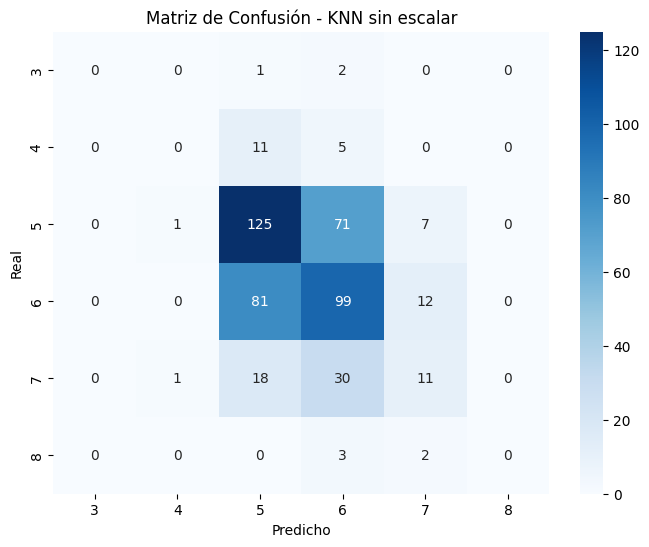

Accuracy medio CV (5 folds): 0.4421473354231975


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo KNN sin escalar
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN sin escalar')
plt.show()

# Validación cruzada
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

## 2. KNN con escalado

Ahora estandarizamos las variables predictoras antes de entrenar el modelo KNN, lo que suele mejorar el desempeño en este tipo de algoritmos.

Exactitud en test: 0.5854166666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.64      0.71      0.67       204
           6       0.55      0.59      0.57       192
           7       0.50      0.38      0.43        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.55      0.59      0.57       480

Accuracy medio CV (5 folds): 0.525323275862069


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

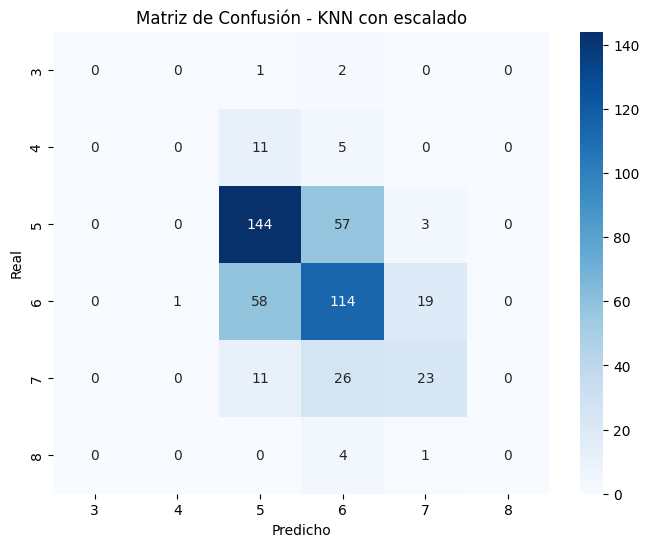

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN con escalado
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scaler_cv = StandardScaler()
scores = cross_val_score(knn, scaler_cv.fit_transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN con escalado')
plt.show()



Mejor k: 1
Mejor accuracy CV: 0.6094931133888533
Accuracy en test: 0.6125

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.31      0.31      0.31        16
           5       0.72      0.68      0.70       204
           6       0.59      0.62      0.61       192
           7       0.45      0.48      0.47        60
           8       0.20      0.20      0.20         5

    accuracy                           0.61       480
   macro avg       0.38      0.38      0.38       480
weighted avg       0.61      0.61      0.61       480



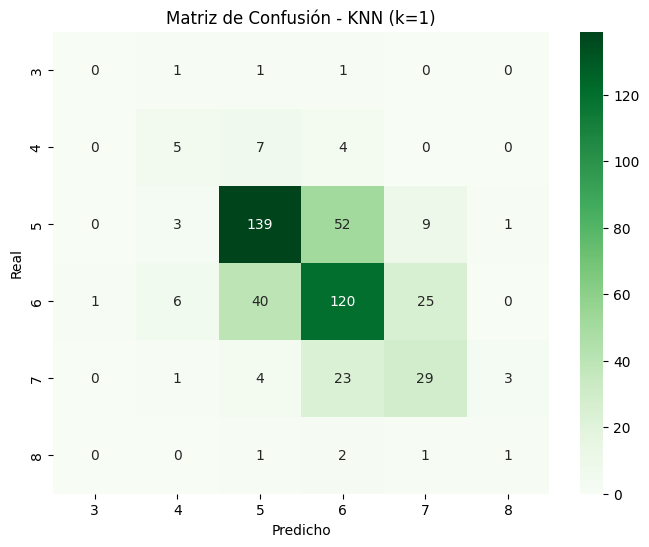

In [5]:
# --- 0) Librerías
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Dataset ya cargado y escalado (X_train_scaled, X_test_scaled, y_train, y_test)
# (Asegúrate de ejecutar las celdas anteriores para definir estas variables)

# --- 2) Definir grilla de valores de k
param_grid = {"n_neighbors": np.arange(1, 21)}

# --- 3) Búsqueda de mejor k con validación cruzada
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid_knn.fit(X_train_scaled, y_train)

print("Mejor k:", grid_knn.best_params_["n_neighbors"])
print("Mejor accuracy CV:", grid_knn.best_score_)

# --- 4) Entrenar modelo final con el mejor k
best_k = grid_knn.best_params_["n_neighbors"]
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# --- 5) Predicciones en test
y_pred_knn = knn_final.predict(X_test_scaled)

# --- 6) Evaluación
print("Accuracy en test:", accuracy_score(y_test, y_pred_knn))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_knn))

# --- 7) Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", 
            xticklabels=np.sort(np.unique(y_test)), 
            yticklabels=np.sort(np.unique(y_test)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión - KNN (k={best_k})")
plt.show()


## KNN con escalado y datos balanceados

A continuación se muestra cómo aplicar KNN sobre los datos estandarizados y balanceados mediante sobremuestreo (RandomOverSampler), para comparar con la versión original.

Exactitud en test (balanceado): 0.49375

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.18      0.38      0.24        16
           5       0.68      0.55      0.61       204
           6       0.55      0.40      0.46       192
           7       0.32      0.67      0.43        60
           8       0.09      0.20      0.12         5

    accuracy                           0.49       480
   macro avg       0.30      0.37      0.31       480
weighted avg       0.56      0.49      0.51       480



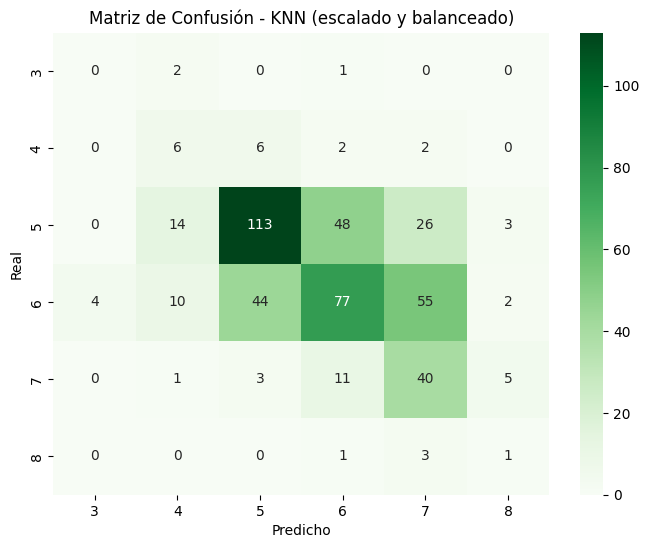

Accuracy medio CV (5 folds, balanceado): 0.8060807429917378


In [2]:
# Balanceo con RandomOverSampler (sobremuestreo)
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo KNN (puedes ajustar n_neighbors según tu búsqueda óptima)
knn_bal = KNeighborsClassifier(n_neighbors=5)
knn_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = knn_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (escalado y balanceado)")
plt.show()

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(knn_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())